# Bagging vs. Decision Trees

## Load dataset

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=5000, noise=.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

## Bagging Classifier

Accuracy ensemble bagging  0.9192
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       596
           1       0.93      0.92      0.92       654

    accuracy                           0.92      1250
   macro avg       0.92      0.92      0.92      1250
weighted avg       0.92      0.92      0.92      1250



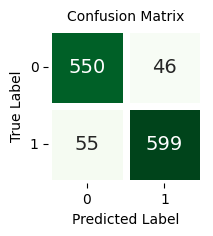

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#Bagging classifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42),
    n_estimators = 800, #weak learners
    max_samples = 500,#samples per weak estimator
    bootstrap = True, #replace  samples
    n_jobs= -1, #parallel jobs - use all processors
    random_state = 42)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)
print("Accuracy ensemble bagging ",accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

#Confusion matriz
cm = confusion_matrix(y_test, y_pred)

df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )

f,ax = plt.subplots(figsize=(2,2))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 14})
plt.xlabel("Predicted Label")
plt.xticks(size = 10)
plt.yticks(size = 10, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 10)
plt.show()


## Normal Decision Tree

Accuracy single tree 0.8704
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       596
           1       0.88      0.87      0.88       654

    accuracy                           0.87      1250
   macro avg       0.87      0.87      0.87      1250
weighted avg       0.87      0.87      0.87      1250



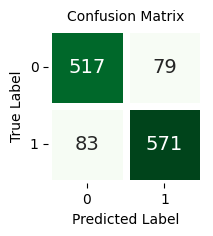

In [25]:
#Regular decision tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)
print("Accuracy single tree",accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

#Confusion matriz
cm = confusion_matrix(y_test, y_pred)

df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )

f,ax = plt.subplots(figsize=(2,2))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 14})
plt.xlabel("Predicted Label")
plt.xticks(size = 10)
plt.yticks(size = 10, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 10)
plt.show()
